# ***Impoting the libraries and csv file***

In [2]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as ply
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv('/content/drive/MyDrive/logging file.csv')

df

,step,type,amount,nameOrig,nameDest,isFraud,changebalanceOrig,changebalanceDest
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0.0,9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0.0,1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,C553264065,1.0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,C38997010,1.0,181.00,21182.00
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0.0,11668.14,0.00
...,...,...,...,...,...,...,...,...
138111,11,TRANSFER,1023642.86,C1959247934,C1219349215,0.0,144636.00,5430.52
138112,11,CASH_OUT,110828.64,C2063932957,C1582808814,0.0,110828.65,-369848.06
138113,11,CASH_OUT,168177.59,C850779719,C209813603,0.0,168177.59,-348707.29
138114,11,CASH_OUT,345671.65,C1697243396,C224342296,0.0,93363.19,-456950.59


# ***Checking for missing values***

In [4]:
df.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
nameDest             0
isFraud              0
changebalanceOrig    0
changebalanceDest    0
dtype: int64

# ***Encoding Categorical data***

In [5]:
dfl = df.copy()

In [6]:
dfl.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud',
       'changebalanceOrig', 'changebalanceDest'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder ()
dfl['type'] = le.fit_transform(dfl['type'])
dfl['nameOrig'] = le.fit_transform(dfl['nameOrig'])
dfl['nameDest'] = le.fit_transform(dfl['nameDest'])


In [8]:
dfl

,step,type,amount,nameOrig,nameDest,isFraud,changebalanceOrig,changebalanceDest
0,1,3,9839.64,16372,42301,0.0,9839.64,0.00
1,1,3,1864.28,47472,44059,0.0,1864.28,0.00
2,1,4,181.00,21612,12010,1.0,181.00,0.00
3,1,1,181.00,126702,10688,1.0,181.00,21182.00
4,1,3,11668.14,74642,21794,0.0,11668.14,0.00
...,...,...,...,...,...,...,...,...
138111,11,4,1023642.86,68179,1758,0.0,144636.00,5430.52
138112,11,1,110828.64,75715,4672,0.0,110828.65,-369848.06
138113,11,1,168177.59,127472,8869,0.0,168177.59,-348707.29
138114,11,1,345671.65,49699,9367,0.0,93363.19,-456950.59


In [9]:
def unique(dfl):
  for col in df.columns:
    print(f'{col}')
    print()
    print(df[col].value_counts())
    print('\n')
    print('_'*100)

unique(dfl)

step

9     37628
10    35991
11    29399
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64


____________________________________________________________________________________________________
type

PAYMENT     52865
CASH_OUT    44256
CASH_IN     27997
TRANSFER    11712
DEBIT        1286
Name: type, dtype: int64


____________________________________________________________________________________________________
amount

6285.19       3
25975.86      3
29707.86      3
2367.99       3
17320.91      3
             ..
184007.05     1
1087532.88    1
336740.77     1
442406.93     1
175087.49     1
Name: amount, Length: 137234, dtype: int64


____________________________________________________________________________________________________
nameOrig

C1709295811    2
C1231006815    1
C964811063     1
C1144414057    1
C1874807440    1
              ..
C1254684761    1
C558935259     1
C2009402586    1
C503014602     1


# ***Feature Engineering***

In [10]:

X=dfl.drop('isFraud', axis=1)
y = dfl["isFraud"]

scaler = StandardScaler().fit(X)
X1 = pd.DataFrame(scaler.transform(X))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, stratify=y, random_state=42)
X1_train

,0,1,2,3,4,5,6
136001,1.002448,-1.352749,0.402993,-0.824621,-0.746674,-2.236211,0.307121
23118,-0.602799,1.609721,6.162761,1.284996,-0.777007,7.758267,-6.645367
3209,-3.813293,0.869103,-0.505094,-0.177798,0.839931,0.165145,0.304316
105499,0.467366,0.869103,-0.463952,-1.460534,0.527761,0.270014,0.304316
79455,0.467366,1.609721,2.307339,1.415445,-1.020902,0.341175,-1.530584
...,...,...,...,...,...,...,...
34331,-0.602799,0.869103,-0.484034,1.194001,1.050203,0.218827,0.304316
108637,0.467366,-1.352749,0.014535,-0.257708,-0.954582,-1.246056,0.464605
55914,-0.067716,0.869103,-0.488491,0.732630,0.720399,0.121794,0.304316
111530,1.002448,-1.352749,0.443771,1.455800,-0.740042,-2.340152,0.693503


In [11]:
X1.describe()

,0,1,2,3,4,5,6
count,138116.000000,1.381160e+05,1.381160e+05,1.381160e+05,1.381160e+05,1.381160e+05,1.381160e+05
mean,0.000000,-1.102989e-16,4.465457e-17,1.007815e-16,1.625673e-17,2.675159e-18,-5.185692e-17
std,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-4.348375,-1.352749e+00,-5.221010e-01,-1.732040e+00,-1.073650e+00,-9.495265e+00,-4.251989e+01
25%,-0.602799,-6.121318e-01,-4.902372e-01,-8.660120e-01,-7.498618e-01,1.217936e-01,2.039486e-02
50%,-0.067716,-6.121318e-01,-3.463258e-01,-9.173338e-06,-4.232970e-01,1.217936e-01,3.043160e-01
75%,0.467366,8.691033e-01,1.248238e-01,8.660187e-01,6.696693e-01,1.999917e-01,3.043160e-01
max,1.002448,1.609721e+00,2.873921e+01,1.732047e+00,2.444838e+00,7.470687e+01,1.468565e+01


**MODEL 1-Isolation Forest**

In [12]:
#Isolation Forest
from sklearn.ensemble import IsolationForest as iso
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model1 = iso(n_estimators=740, random_state=42)
model1.fit(X1_train)

# Create and fit the One-Class SVM model
y1_pred = model1.predict(X1_test)

y1_pred = pd.Series(y1_pred)
y1_pred = y1_pred.apply(lambda x: 1 if x == -1 else 0)

#Evaluating the model
print(accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.8649724876918622
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     27600
         1.0       0.00      0.50      0.01        24

    accuracy                           0.86     27624
   macro avg       0.50      0.68      0.47     27624
weighted avg       1.00      0.86      0.93     27624

[[23882  3718]
 [   12    12]]


**MODEL 2- One Class SVM**

In [13]:
#ONECLASS SVM
from sklearn.svm import OneClassSVM

# Create and fit the One-Class SVM model
model2 = OneClassSVM(nu=0.05)
model2.fit(X1_train)

# Predict outliers
y2_pred = model2.predict(X1_test)

# Convert predictions to binary labels
y2_pred = pd.Series(y2_pred).apply(lambda x: 1 if x == -1 else 0)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y1_test, y2_pred))
print("\nClassification Report:\n", classification_report(y1_test, y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y2_pred))


Accuracy Score: 0.9518172603533159

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     27600
         1.0       0.01      0.38      0.01        24

    accuracy                           0.95     27624
   macro avg       0.50      0.66      0.49     27624
weighted avg       1.00      0.95      0.97     27624


Confusion Matrix:
 [[26284  1316]
 [   15     9]]


In [ ]:
!pip install catboost

In [ ]:

# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'OneClassSVM': OneClassSVM(),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

# Define hyperparameter grids for each model
param_grids = {
    'RandomForest': {'n_estimators': [50, 100, 200]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'CatBoost': {'iterations': [50, 100, 200]},
    'LightGBM': {'n_estimators': [50, 100, 200]},
    'OneClassSVM': {},  # Hyperparameter tuning not applicable for One-Class SVM
    'KNN': {'n_neighbors': [3, 5, 7]},
    'NaiveBayes': {}  # Hyperparameter tuning not applicable for Naive Bayes
}

# Use accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Lists to store metric values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"GridSearchCV for {model_name}:")
    grid_search = GridSearchCV(model, param_grids[model_name], scoring=scorer, cv=3)
    grid_search.fit(X1_train, y1_train)

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_estimator.predict(X1_test)

    # Calculate metrics
    accuracy = accuracy_score(y1_test, y_pred)
    precision = precision_score(y1_test, y_pred)
    recall = recall_score(y1_test, y_pred)
    f1 = f1_score(y1_test, y_pred)

    # Append metric values to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Plot the metrics
plt.figure(figsize=(12, 8))

# Bar plots for each metric
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Accuracy Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')
plt.title('F1 Score Across Models')
plt.show()


KeyboardInterrupt: 

Cross-validation for RandomForest:
Mean Cross-validation Accuracy: 0.9992669150059298
Accuracy on Test Set: 0.9993483927019983

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27600
         1.0       1.00      0.25      0.40        24

    accuracy                           1.00     27624
   macro avg       1.00      0.62      0.70     27624
weighted avg       1.00      1.00      1.00     27624


Confusion Matrix:
 [[27600     0]
 [   18     6]]

-----------------------------------

Cross-validation for LogisticRegression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Mean Cross-validation Accuracy: 0.9991492600024133
Accuracy on Test Set: 0.9991311902693311

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27600
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00     27624
   macro avg       0.50      0.50      0.50     27624
weighted avg       1.00      1.00      1.00     27624


Confusion Matrix:
 [[27600     0]
 [   24     0]]

-----------------------------------

Cross-validation for LightGBM:
[LightGBM] [Info] Number of positive: 65, number of negative: 73596
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 73661, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000882 -> initscore=-7.031959


<ipython-input-15-a4b118b744af>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


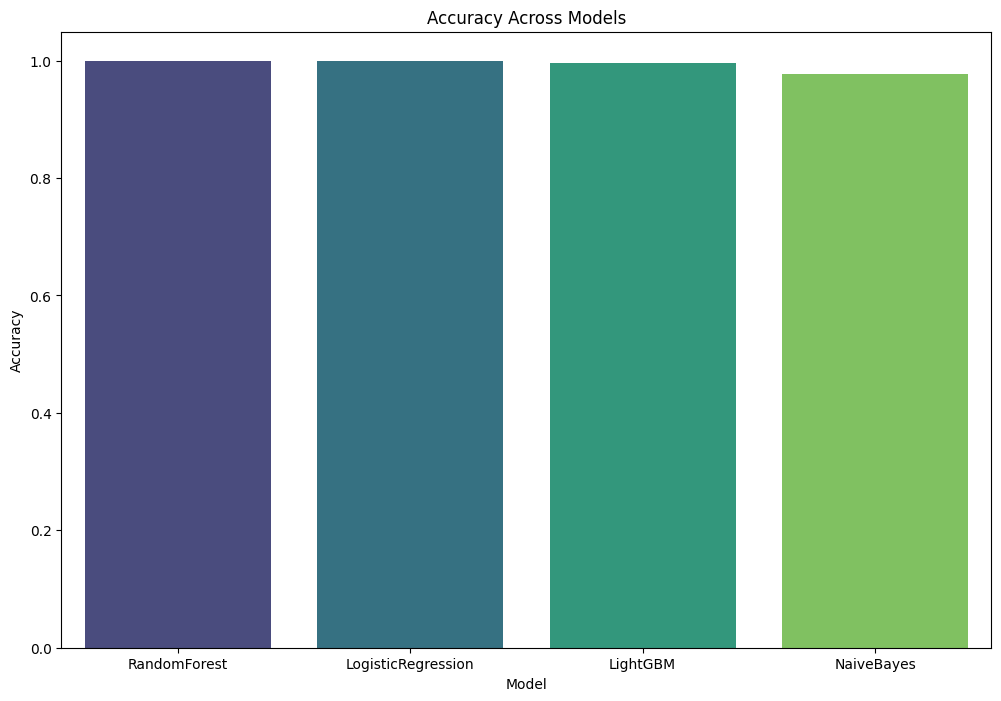

<ipython-input-15-a4b118b744af>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')


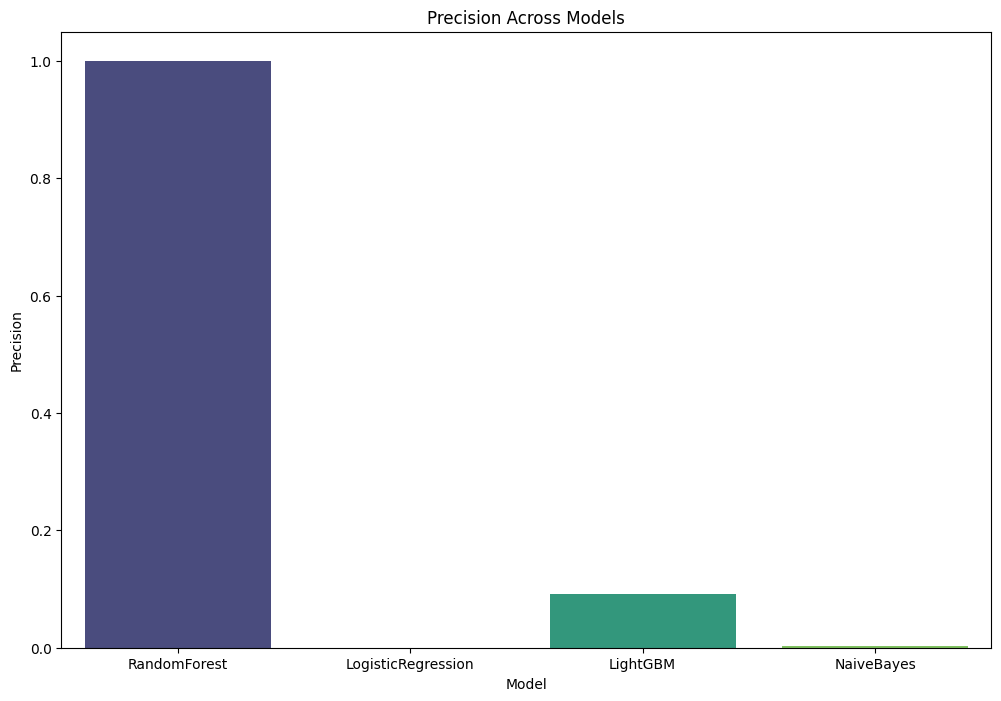

<ipython-input-15-a4b118b744af>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')


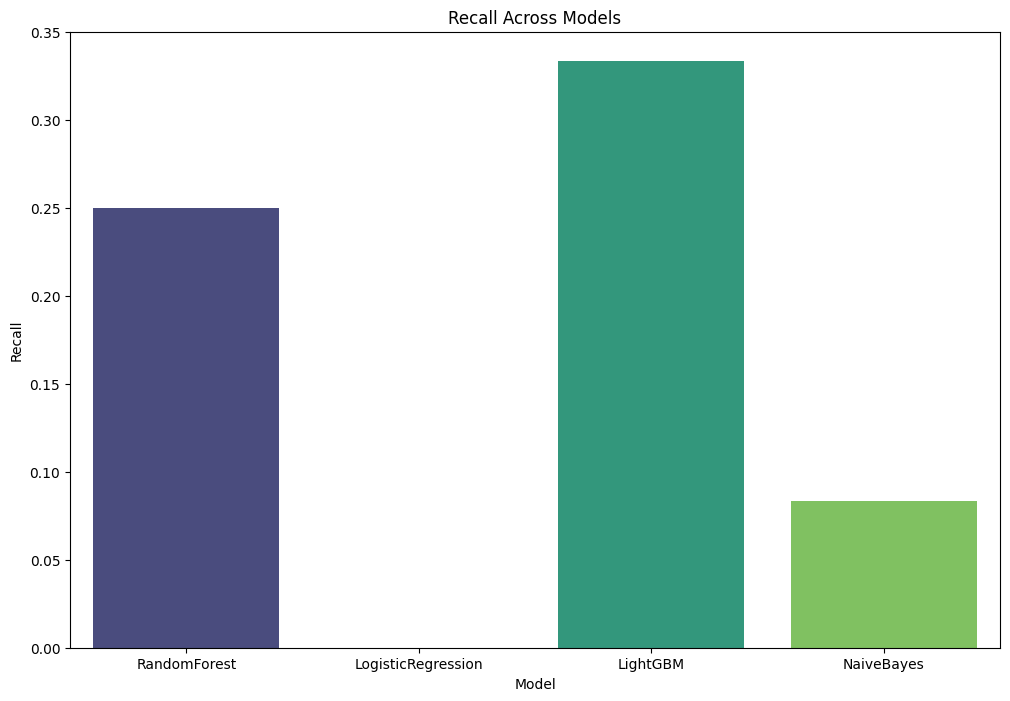

<ipython-input-15-a4b118b744af>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')


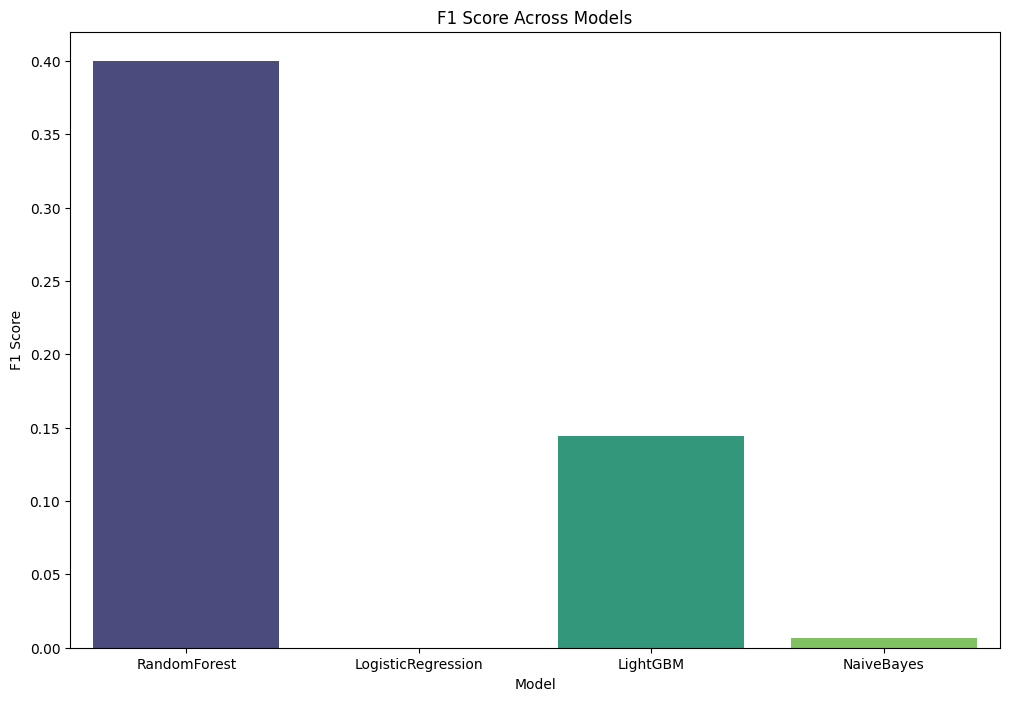

In [ ]:
# the models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'LightGBM': LGBMClassifier(),
    'NaiveBayes': GaussianNB()
}

#  accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Lists to store metric values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

#ross-validation for each model
for model_name, model in models.items():
    print(f"Cross-validation for {model_name}:")
    # Perform 3-fold cross-validation
    cv_scores = cross_val_score(model, X1_train, y1_train, scoring=scorer, cv=3)

    mean_accuracy = cv_scores.mean()

    model.fit(X1_train, y1_train)

    y_pred = model.predict(X1_test)

    # Calculate metrics
    accuracy = accuracy_score(y1_test, y_pred)
    precision = precision_score(y1_test, y_pred)
    recall = recall_score(y1_test, y_pred)
    f1 = f1_score(y1_test, y_pred)

    # metric values to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Mean Cross-validation Accuracy: {mean_accuracy}")
    print(f"Accuracy on Test Set: {accuracy}")
    print("\nClassification Report:\n", classification_report(y1_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y_pred))
    print("\n-----------------------------------\n")

# plotting
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Plot the metrics
plt.figure(figsize=(12, 8))

# Bar plots for each metric
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Accuracy Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall Across Models')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')
plt.title('F1 Score Across Models')
plt.show()


**SAVING THE FINALISED MODEL**

In [15]:
import pickle

pickle.dump(model2 , open("final_model.pkl" , "wb"))